<a href="https://colab.research.google.com/github/mohammad-rakibul-alam/COVID-19-Pneumonia-Normal-Xray-Image-Classification/blob/main/COVID_19_Pneumonia_Normal_Xray_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/My Drive/CNN-data/CNN-Dataset

/content/drive/My Drive/CNN-data/CNN-Dataset


In [3]:
ls

 COVID/   Normal/  'Viral Pneumonia'/


In [4]:
pip install np_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 546 kB/s 
  Created wheel for np-utils: filename=np_utils-0.6.0-py3-none-any.whl size=56459 sha256=dbf951c8e994aaeb9a79224742197e54fbc4257d7a705f179c1c0f395c4d1bd7
  Stored in directory: /root/.cache/pip/wheels/d2/83/71/a781667865955ae7dc18e5a4038401deb56d96eb85d3a5f1c0
Successfully built np-utils


In [5]:
#libraries required to train the model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
import cv2, os, gc, glob
from tqdm import tqdm
from tensorflow.keras import layers, models
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [9]:
dataDirectory="/content/drive/My Drive/CNN-data/CNN-Dataset"

In [11]:
imagePath=[]
for (directoryNames, folderNames, fileNames) in os.walk(dataDirectory): 
    print(directoryNames,folderNames,fileNames)
    for fileName in fileNames:
        if (fileName[-3:]=='png'): 
            imagePath.append(os.path.join(directoryNames, fileName))

/content/drive/My Drive/CNN-data/CNN-Dataset ['COVID', 'Viral Pneumonia', 'Normal'] []
/content/drive/My Drive/CNN-data/CNN-Dataset/COVID [] ['COVID-1243.png', 'COVID-1244.png', 'COVID-1232.png', 'COVID-1240.png', 'COVID-1227.png', 'COVID-1229.png', 'COVID-1236.png', 'COVID-1242.png', 'COVID-1233.png', 'COVID-1237.png', 'COVID-1250.png', 'COVID-1230.png', 'COVID-1249.png', 'COVID-1238.png', 'COVID-1247.png', 'COVID-1228.png', 'COVID-1245.png', 'COVID-1246.png', 'COVID-1269.png', 'COVID-1263.png', 'COVID-1254.png', 'COVID-1261.png', 'COVID-1258.png', 'COVID-1256.png', 'COVID-1276.png', 'COVID-1253.png', 'COVID-1267.png', 'COVID-1266.png', 'COVID-1260.png', 'COVID-1255.png', 'COVID-1252.png', 'COVID-1271.png', 'COVID-1270.png', 'COVID-1274.png', 'COVID-1259.png', 'COVID-1262.png', 'COVID-1275.png', 'COVID-1257.png', 'COVID-1265.png', 'COVID-1273.png', 'COVID-1251.png', 'COVID-1268.png', 'COVID-1264.png', 'COVID-1272.png', 'COVID-1298.png', 'COVID-1288.png', 'COVID-1295.png', 'COVID-1287.

In [12]:
data=[]
target=[]
resize=128

dic={'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19'}

In [13]:
for imagePaths in tqdm(imagePath): 
    label=imagePaths.split(os.path.sep)[-2]
    image=cv2.imread(imagePaths)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image=cv2.resize(image, (resize, resize)) /255 
    
    data.append(image)
    target.append(dic[label])

100%|██████████| 9951/9951 [1:26:26<00:00,  1.92it/s]


In [24]:
print(len(data)) 

9951


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


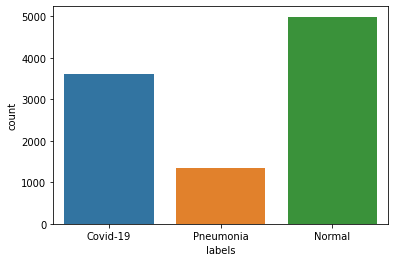

In [25]:
df=pd.DataFrame(target,columns=['labels'])
sns.countplot(df['labels'])
plt.show()

In [26]:
size=[]
for file in imagePath: 
    img=plt.imread(file)
    size.append(img.shape) 
pd.Series(size).value_counts() 

(299, 299)       9811
(299, 299, 3)     140
dtype: int64

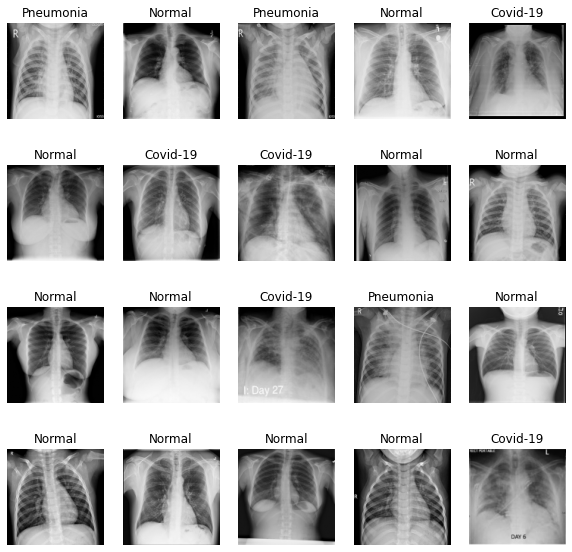

In [27]:
plt.figure(figsize=(10,10))
for c , i in enumerate(list(np.random.randint(0,len(imagePath),20))):
    plt.subplot(4,5,c+1)
    plt.imshow(data[i] , cmap='gray')
    plt.title(target[i])
    plt.axis('off')     
plt.show()

In [28]:
#encode labels as integer
le=LabelEncoder() #labelencoder used to normalize labels
labels=le.fit_transform(target) #also be used to transform non-numerical labels to numerical labels
labels=to_categorical(labels)

print(le.classes_)
print(labels[0])

['Covid-19' 'Normal' 'Pneumonia']
[1. 0. 0.]


In [29]:
#spliting data into training and testing (80-20 Ratio)

(trainSetX, testSetX, trainSetY, testSetY)=train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

trainSetX=np.array(trainSetX)
testSetX=np.array(testSetX)
trainSetY=np.array(trainSetY)
testSetY=np.array(testSetY)

print(trainSetX.shape)
print(testSetX.shape)
print(trainSetY.shape)
print(testSetY.shape)

(7960, 128, 128, 3)
(1991, 128, 128, 3)
(7960, 3)
(1991, 3)


In [30]:
trainSetX[0]

array([[[0.        , 0.        , 0.        ],
        [0.01176471, 0.01176471, 0.01176471],
        [0.02745098, 0.02745098, 0.02745098],
        ...,
        [0.01960784, 0.01960784, 0.01960784],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471]],

       [[0.02745098, 0.02745098, 0.02745098],
        [0.05098039, 0.05098039, 0.05098039],
        [0.05882353, 0.05882353, 0.05882353],
        ...,
        [0.04313725, 0.04313725, 0.04313725],
        [0.03137255, 0.03137255, 0.03137255],
        [0.02352941, 0.02352941, 0.02352941]],

       [[0.0745098 , 0.0745098 , 0.0745098 ],
        [0.0745098 , 0.0745098 , 0.0745098 ],
        [0.0745098 , 0.0745098 , 0.0745098 ],
        ...,
        [0.06666667, 0.06666667, 0.06666667],
        [0.05490196, 0.05490196, 0.05490196],
        [0.04313725, 0.04313725, 0.04313725]],

       ...,

       [[0.00392157, 0.00392157, 0.00392157],
        [0.05882353, 0.05882353, 0.05882353],
        [0.10588235, 0

In [31]:
from tensorflow.keras import backend as K
K.clear_session()

# CNN Model

In [32]:
#1st Model
model=Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), activation="relu", input_shape=(128,128,3)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))

model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(3, activation="softmax"))

In [33]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 64)       0

In [37]:
#compile
model.compile(optimizer=Adam(), 
              loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

In [38]:
data=[]
imagePath=[]
df=[]
size=[]

In [39]:
modelData = model.fit(trainSetX,
                     trainSetY,
                     epochs = 20,
                     batch_size = 64,
                     validation_split=0.2)

Epoch 1/20
100/100 [==============================] - 54s 529ms/step - loss: 0.6791 - accuracy: 0.6809 - val_loss: 0.4224 - val_accuracy: 0.8317
Epoch 2/20
100/100 [==============================] - 52s 523ms/step - loss: 0.4032 - accuracy: 0.8466 - val_loss: 0.2979 - val_accuracy: 0.8882
Epoch 3/20
100/100 [==============================] - 53s 533ms/step - loss: 0.2875 - accuracy: 0.8916 - val_loss: 0.2248 - val_accuracy: 0.9190
Epoch 4/20
100/100 [==============================] - 53s 526ms/step - loss: 0.2263 - accuracy: 0.9160 - val_loss: 0.2333 - val_accuracy: 0.9177
Epoch 5/20
100/100 [==============================] - 53s 527ms/step - loss: 0.1838 - accuracy: 0.9334 - val_loss: 0.1989 - val_accuracy: 0.9290
Epoch 6/20
100/100 [==============================] - 53s 533ms/step - loss: 0.1859 - accuracy: 0.9292 - val_loss: 0.1916 - val_accuracy: 0.9340
Epoch 7/20
100/100 [==============================] - 52s 524ms/step - loss: 0.1476 - accuracy: 0.9419 - val_loss: 0.1756 - val_ac

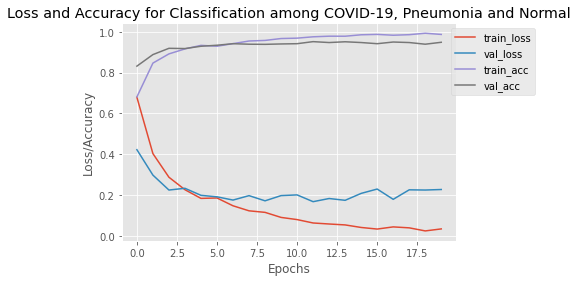

In [43]:
#loss/accuracy graph
n=20
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, n), modelData.history["loss"], label="train_loss")
plt.plot(np.arange(0, n), modelData.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n), modelData.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n), modelData.history["val_accuracy"], label="val_acc")
plt.title("Loss and Accuracy for Classification among COVID-19, Pneumonia and Normal")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))

In [46]:
#test loss & accuacy
testLoss, testAccuracy=model.evaluate(testSetX, testSetY, verbose=0)

print('Test Loss is: {}'.format(modelLoss))
print('Test Accuracy is: {}'.format(modelAccuracy ))

Test Loss is: 0.2623056173324585
Test Accuracy is: 0.9316926002502441


In [52]:
predictedData = []

In [53]:
#classification report on test
predIdxs=model.predict(testSetX, batch_size=64)
predIdxs=np.argmax(predIdxs, axis=1)

In [55]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusionmatrix=confusion_matrix(testSetY.argmax(axis=1), predIdxs)
print(confusionmatrix)

[[696  26   2]
 [ 71 903  24]
 [  8   5 256]]


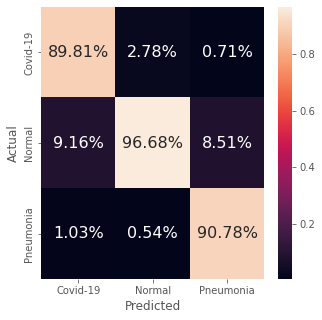

In [56]:
#heatmap
df_cm=pd.DataFrame(confusionmatrix, columns=le.classes_, index=le.classes_)
df_cm.index.name='Actual'
df_cm.columns.name='Predicted'
plt.figure(figsize=(5,5))
sns.heatmap(df_cm/np.sum(df_cm), fmt='.2%', annot=True, annot_kws={'size':16})
plt.show()